<a href="https://colab.research.google.com/github/luperezsal/DaVincis/blob/master/Main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = 'data/'
DATA_PATH = 'https://raw.githubusercontent.com/luperezsal/DaVincis/master/data/'

TRAINING_DATA_PATH = f"{DATA_PATH}training_data/"
TEST_DATA_PATH = f"{DATA_PATH}test_data/"

# Load Data

In [ ]:
X_train = pd.read_csv(f"{TRAINING_DATA_PATH}train_data.csv", names = ['tweet'])
Y_train_1 = pd.read_csv(f"{TRAINING_DATA_PATH}train_labels_subtask_1.csv", names = ['Incident'])
Y_train_2 = pd.read_csv(f"{TRAINING_DATA_PATH}train_labels_subtask_2.csv", header = None)

## Subtask 1

In [ ]:
Y_train_1_labeled = Y_train_1.copy()

In [ ]:
boolean_mask = Y_train_1 == 0
Y_train_1_labeled['Incident'] = Y_train_1_labeled.mask(boolean_mask, 'Violent')

boolean_mask = Y_train_1 == 1
Y_train_1_labeled['Incident'] = Y_train_1_labeled.mask(boolean_mask, 'Non Violent')

Y_train_1_labeled = Y_train_1_labeled['Incident']

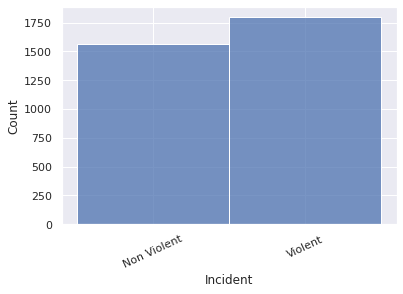

In [ ]:
sns.set(style="darkgrid")
histogram = sns.histplot(Y_train_1_labeled)
histogram.tick_params(axis='x', rotation=25)

In [ ]:
sample_index = Y_train_1_labeled[Y_train_1_labeled == 'Violent'].index[15]
print(f"None of the above: {X_train.loc[sample_index].tweet}\n")

sample_index = Y_train_1_labeled[Y_train_1_labeled == 'Non Violent'].index[15]
print(f"None of the above: {X_train.loc[sample_index].tweet}\n")

None of the above: #Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias  https://t.co/xXKSnVjz8k...  https://t.co/HcoPbEpPLk

None of the above: Cali es una trampa en la que uno no busca los accidentes ni que lo asalten a uno, esas dos cosas lo buscan a uno. Me referiré al accidente que me encontró ahora en la noche. Un hueco en un anden de Granada en el que quedé atrapado y casi me rompe el tobillo. Av 9A N con 16 Norte.  https://t.co/KNevmfuuRo



# Analysis

In [ ]:
from ipywidgets import widgets
from IPython.display import display

text = widgets.Text()

## Subtask 2

In [ ]:
Y_train_2 = pd.read_csv(f"{TRAINING_DATA_PATH}train_labels_subtask_2.csv", header=None)

In [ ]:
Y_train_2_labeled = Y_train_2.copy()

Y_train_2_labeled['Incident'] = '0'

A continuación se transforman las etiquetas de entrenamiento de forma `one-hot` a formato String para realizar una representación interpretable de las clases contenidas en el dataset.

In [ ]:
boolean_mask = Y_train_2.idxmax(axis=1) == 0
Y_train_2_labeled['Incident'] = Y_train_2_labeled['Incident'].mask(boolean_mask, 'Accident')

boolean_mask = Y_train_2.idxmax(axis=1) == 1
Y_train_2_labeled['Incident'] = Y_train_2_labeled['Incident'].mask(boolean_mask, 'Homicide')

boolean_mask = Y_train_2.idxmax(axis=1) == 2
Y_train_2_labeled['Incident'] = Y_train_2_labeled['Incident'].mask(boolean_mask, 'None of the above')

boolean_mask = Y_train_2.idxmax(axis=1) == 3
Y_train_2_labeled['Incident'] = Y_train_2_labeled['Incident'].mask(boolean_mask, 'Theft')

boolean_mask = Y_train_2.idxmax(axis=1) == 4
Y_train_2_labeled['Incident'] = Y_train_2_labeled['Incident'].mask(boolean_mask, 'Kidnapping')

Y_train_2_labeled = Y_train_2_labeled['Incident']

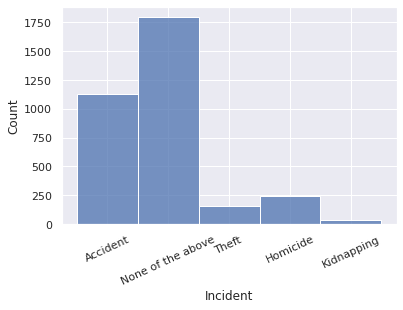

In [ ]:
sns.set(style="darkgrid")
histogram = sns.histplot(Y_train_2_labeled)
histogram.tick_params(axis='x', rotation=25)

In [ ]:
sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Accident'].index[15]
print(f"Accident example: {X_train.loc[sample_index].tweet}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Homicide'].index[15]
print(f"Homicide example: {X_train.loc[sample_index].tweet}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'None of the above'].index[15]
print(f"None of the above: {X_train.loc[sample_index].tweet}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Theft'].index[15]
print(f"Theft: {X_train.loc[sample_index].tweet}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Kidnapping'].index[15]
print(f"Kidnapping: {X_train.loc[sample_index].tweet}")

Accident example: Nuevo Accidente, carril izquierdo bloqueado en #SeDallas en la I-20 WB en JJ Lemmon Rd, deténgase y regrese el tráfico a Trinity River Brg  https://t.co/6XRbCfL48n

Homicide example: 📹 #VIDEOS | Ola de violencia en #Oaxaca: asesinan a magistrado, a una familia y a tres mujeres  https://t.co/CSgnsxcUD1  https://t.co/CgP46rgPLJ

None of the above: #Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias  https://t.co/xXKSnVjz8k...  https://t.co/HcoPbEpPLk

Theft: #02Julio #Comparte  ¡Ayudemos a recuperarlo!  La mañana de este viernes, se informó el robo de un vehículo Nissan, Tsuru, que es taxi del sitio Ejecutivo, con número económico 120, en la colonia Morelos de Jiutepec, con placas de circulación A671LTH.  https://t.co/RTs0mMjfkB

Kidnapping: Myron Eugene Johnson de 26 años está sie

Test colab
